In [1]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

import pandas as pd
import matplotlib.pyplot as plt


# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="2944a580-6c5f-4258-8c86-b9c5de957998",
    resource_group_name="calebebraga08-rg",
    workspace_name="tcc-experiments",
)

In [2]:
TRAIN_DATA_PATH = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-standard-e4ds-v4/code/Users/calebebraga08/data/train_data/"
TEST_DATA_PATH = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-standard-e4ds-v4/code/Users/calebebraga08/data/test_data/"

TRAIN_DATAS = [
    "vrex_1999_2000_2001_2002_2003_.csv",
    "vrex_2004_2005_2006_2007_2008_.csv",
    "vrex_2009_2010_2011_2012_2013_.csv",
    "vrex_2014_2015_2016_2017_2018_.csv",
    "vrex_2019_2020_2021_.csv"
]

TEST_DATAS = [
    "vrex_2004.csv",
    "vrex_2009.csv",
    "vrex_2014.csv",
    "vrex_2019.csv"
]

v1 = "original"

In [3]:
def _remove_columns(df : pd.DataFrame) -> pd.DataFrame:
    return df.drop(columns=[  'lbl_exploits_delta_days',	
                        'lbl_exploits_weaponized_type_ENUM_absent',
                        'lbl_exploits_weaponized_type_ENUM_other',	
                        'lbl_exploits_weaponized_type_ENUM_auxiliary',
                        'lbl_exploits_weaponized_type_ENUM_exploit',
                        'lbl_exploits_weaponized_count',
                        'lbl_exploits_verified',
                        'idx',
                        'cve',
                        'lbl_exploits_has'
    ])

vrex_1999_2000_2001_2002_2003_.csv
shape original:  (8317, 885)
shape without null values:  (8317, 586)
removed columns:  299


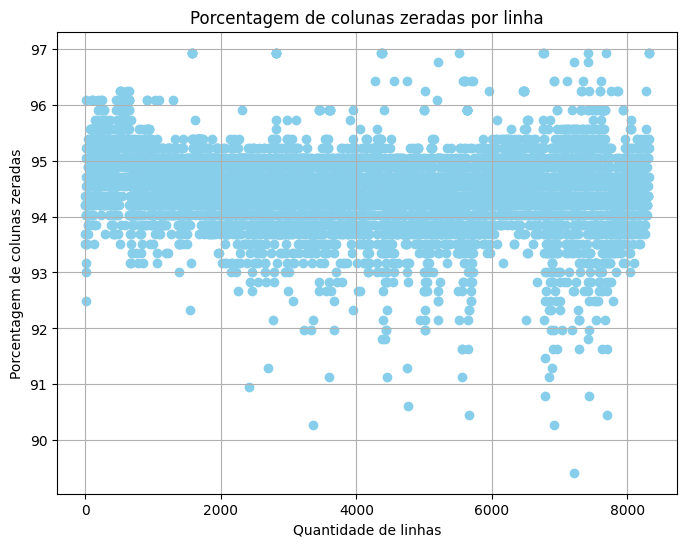

vrex_2004_2005_2006_2007_2008_.csv
shape original:  (28335, 885)
shape without null values:  (28335, 724)
removed columns:  161


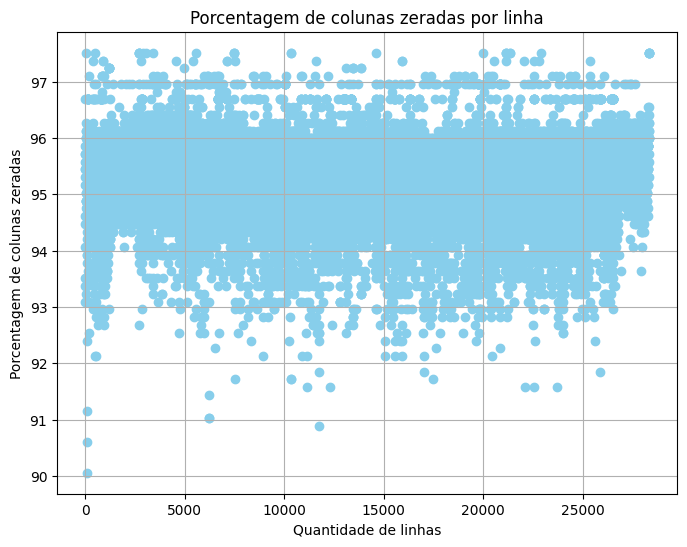

vrex_2009_2010_2011_2012_2013_.csv
shape original:  (27445, 885)
shape without null values:  (27445, 747)
removed columns:  138


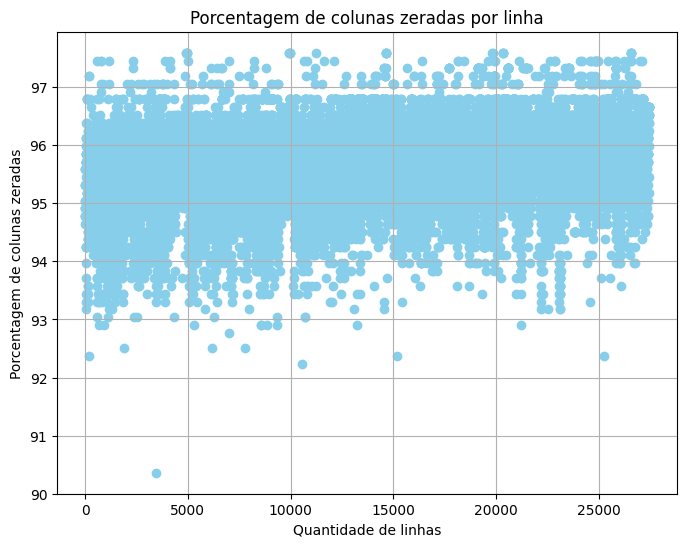

vrex_2014_2015_2016_2017_2018_.csv
shape original:  (60660, 885)
shape without null values:  (60660, 774)
removed columns:  111


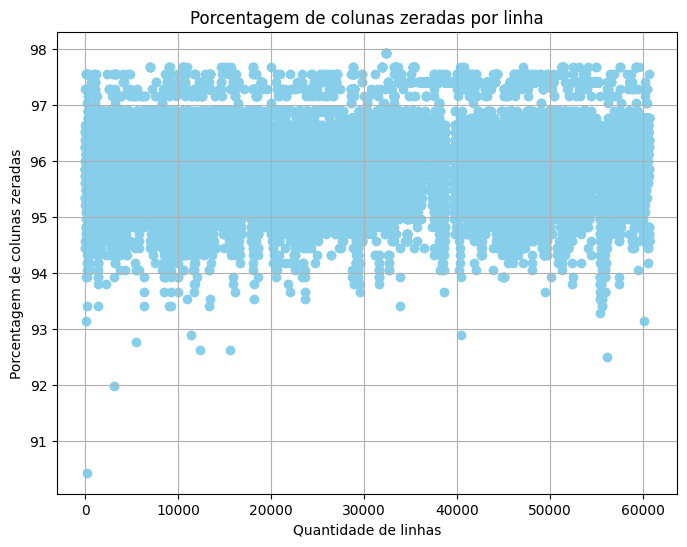

vrex_2019_2020_2021_.csv
shape original:  (32261, 885)
shape without null values:  (32261, 722)
removed columns:  163


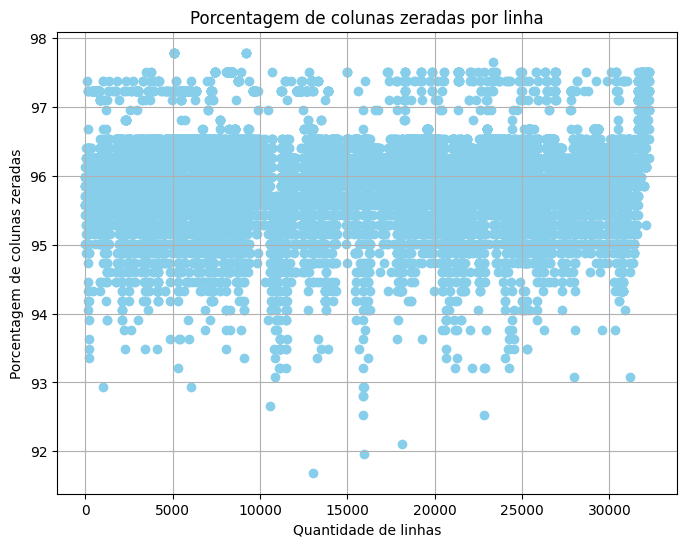

In [4]:
join_removed_columns = []

for df_name in TRAIN_DATAS:
    df_vrex = pd.read_csv(f"{TRAIN_DATA_PATH}{df_name}")
    print(df_name)
    
    print("shape original: ", df_vrex.shape)

    all_columns = df_vrex.columns.tolist()
    
    #remove columns where all values are null
    df_vrex = df_vrex.loc[:, (df_vrex != 0).any(axis=0)]
    
    removed_columns = [column for column in all_columns if column not in df_vrex.columns]
    print("shape without null values: ", df_vrex.shape)
    print("removed columns: ", len(removed_columns) )
    join_removed_columns.extend(removed_columns)

    #Calcular a quantidade de colunas
    columns_count = len(df_vrex.columns)

    #Calcular a porcentagem de colunas zeradas em cada linha
    row_by_null_columns_percents = (df_vrex == 0).sum(axis=1) / columns_count * 100

    #Ordenar o DataFrame de acordo com as porcentagens de colunas zeradas por linha
    #row_by_null_columns_percents_sorted = row_by_null_columns_percents.sort_values()
    #df_vrex_sorted = df_vrex.loc[row_by_null_columns_percents_sorted.index]

    #Plotar o gráfico
    plt.figure(figsize=(8, 6))
    plt.scatter(df_vrex.index, row_by_null_columns_percents, color='skyblue', marker='o', linestyle='-')
    plt.title('Porcentagem de colunas zeradas por linha')
    plt.xlabel('Quantidade de linhas')
    plt.ylabel('Porcentagem de colunas zeradas')
    plt.grid(True)
    plt.show()





In [5]:
join_removed_columns = list(set(join_removed_columns))
print("join removed columns:", join_removed_columns, "len: ", len(join_removed_columns))

join removed columns: ['vendor_ENUM_chadhaajay', 'vendor_ENUM_freetype', 'vendor_ENUM_xpdfreader', 'vendor_ENUM_limesurvey', 'vendor_ENUM_w1_fi', 'vendor_ENUM_sensiolabs', 'vendor_ENUM_alt-n', 'vendor_ENUM_glyphandcog', 'vendor_ENUM_openoffice', 'reference_type_ENUM_caldera', 'vendor_ENUM_python', 'vendor_ENUM_e107', 'description_ENUM_seamonkey', 'vendor_ENUM_splunk', 'vendor_ENUM_paloaltonetworks', 'vendor_ENUM_canon', 'vendor_ENUM_avast', 'reference_type_ENUM_auscert', 'description_ENUM_imagemagick', 'description_ENUM_ffmpeg', 'vendor_ENUM_arm', 'vendor_ENUM_eclipse', 'vendor_ENUM_metinfo', 'reference_type_ENUM_l0pht', 'vendor_ENUM_xfree86_project', 'vendor_ENUM_elastic', 'vendor_ENUM_fusionpbx', 'vendor_ENUM_tibco', 'vendor_ENUM_xine', 'vendor_ENUM_mitel', 'vendor_ENUM_igniterealtime', 'vendor_ENUM_omron', 'reference_type_ENUM_ibm', 'vendor_ENUM_websense', 'vendor_ENUM_otrs', 'description_ENUM_leverage', 'vendor_ENUM_synology', 'vendor_ENUM_graphicsmagick', 'vendor_ENUM_asterisk', '

In [9]:
VREX_PATH = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-standard-e4ds-v4/code/Users/calebebraga08/data/vrex.csv"
df_vrex = pd.read_csv(VREX_PATH)

print("shape original: ", df_vrex.shape)

all_columns = df_vrex.columns.tolist()
    
    #remove columns where all values are null
df_vrex = df_vrex.loc[:, (df_vrex != 0).any(axis=0)]
    
removed_columns = [column for column in all_columns if column not in df_vrex.columns]
print("shape without null values: ", df_vrex.shape)
print("removed columns: ", removed_columns, len(removed_columns))


shape original:  (8317, 885)
shape without null values:  (8317, 586)
removed columns:  299


,idx,cve,delta_days_oval,delta_days_patch,delta_days_proposed,status_ENUM_candidate,status_ENUM_entry,phase_ENUM_assigned,phase_ENUM_interim,phase_ENUM_proposed,...,description_ENUM_accessible,description_ENUM_operation,lbl_exploits_delta_days,lbl_exploits_weaponized_type_ENUM_absent,lbl_exploits_weaponized_type_ENUM_other,lbl_exploits_weaponized_type_ENUM_auxiliary,lbl_exploits_weaponized_type_ENUM_exploit,lbl_exploits_weaponized_count,lbl_exploits_has,lbl_exploits_verified
0,8317,CVE-2004-0001,0.371656,0.0,0.000000,0,1,0,0,0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0
1,8318,CVE-2004-0002,0.000000,0.0,0.003457,1,0,0,0,1,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0
2,8319,CVE-2004-0003,0.002707,0.0,0.000000,1,0,0,0,0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0
3,8320,CVE-2004-0004,0.000000,0.0,0.000000,0,1,0,0,0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0
4,8321,CVE-2004-0005,0.000000,0.0,0.000000,1,0,0,0,0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,11019,CVE-2004-2777,0.000000,0.0,0.000000,1,0,1,0,0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0
2703,11020,CVE-2004-2778,0.000000,0.0,0.000000,1,0,1,0,0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0
2704,11021,CVE-2004-2779,0.000000,0.0,0.000000,1,0,1,0,0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0
2705,11022,CVE-2004-9998,0.000000,0.0,0.000000,1,0,1,0,0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0
